In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
data=pd.read_csv('power.csv')

In [92]:
df=pd.DataFrame(data)

In [93]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
df.shape

(908, 25)

The dataset has 908 rows and 25 columns

In [95]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

we can see the datatypes of each column

In [96]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

The dataset has a lot of null values

# Removing Null values

In [97]:
df['latitude'].fillna(df['latitude'].value_counts().idxmax(), inplace=True)
df['longitude'].fillna(df['longitude'].value_counts().idxmax(), inplace=True)
df['other_fuel1'].fillna(df['latitude'].value_counts().idxmax(), inplace=True)
df['other_fuel2'].fillna(df['other_fuel2'].value_counts().idxmax(), inplace=True)

df['commissioning_year'].fillna(df['commissioning_year'].value_counts().idxmax(), inplace=True)
df['owner'].fillna(df['owner'].value_counts().idxmax(), inplace=True)
df['geolocation_source'].fillna(df['geolocation_source'].value_counts().idxmax(), inplace=True)
df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].value_counts().idxmax(), inplace=True)
df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].value_counts().idxmax(), inplace=True)
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].value_counts().idxmax(), inplace=True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].value_counts().idxmax(), inplace=True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].value_counts().idxmax(), inplace=True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].value_counts().idxmax(), inplace=True)
df['generation_data_source'].fillna(df['generation_data_source'].value_counts().idxmax(), inplace=True)

In [19]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
other_fuel3                 908
commissioning_year            0
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     908
year_of_capacity_data         0
generation_gwh_2013           0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_data_source        0
estimated_generation_gwh    908
dtype: int64

The null values are removed but the columns wepp_id,estimated_generation_gwh,other_fuel3 does not have an data.

# Dropping the columns wepp_id,estimated_generation_gwh,other_fuel3 does not have an data.

In [98]:
df.drop(['other_fuel3','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)

In [99]:
df.shape

(908, 22)

The dataset has 22 columns after dropping the columns

In [100]:
df.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
other_fuel1                object
other_fuel2                object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_data_source     object
dtype: object

# Encoding the Object columns

In [101]:
le=LabelEncoder()
df['country']=le.fit_transform(df['country'])
df['country_long']=le.fit_transform(df['country_long'])
df['name']=le.fit_transform(df['name'])
df['gppd_idnr']=le.fit_transform(df['gppd_idnr'])
df['primary_fuel']=le.fit_transform(df['primary_fuel'])
#df['other_fuel1']=le.fit_transform(df['other_fuel1'])
df['other_fuel2']=le.fit_transform(df['other_fuel2'])

df['owner']=le.fit_transform(df['owner'])

df['source']=le.fit_transform(df['source'])
df['url']=le.fit_transform(df['url'])
df['geolocation_source']=le.fit_transform(df['geolocation_source'])
df['generation_data_source']=le.fit_transform(df['generation_data_source'])


df.dtypes

Columns after encoding the columns

In [102]:
df.drop(['other_fuel1'],axis=1,inplace=True)

Dropping the column other_fuel1

# Detecting Outliers

country                       AxesSubplot(0.125,0.71587;0.110714x0.16413)
country_long               AxesSubplot(0.257857,0.71587;0.110714x0.16413)
name                       AxesSubplot(0.390714,0.71587;0.110714x0.16413)
gppd_idnr                  AxesSubplot(0.523571,0.71587;0.110714x0.16413)
capacity_mw                AxesSubplot(0.656429,0.71587;0.110714x0.16413)
latitude                   AxesSubplot(0.789286,0.71587;0.110714x0.16413)
longitude                    AxesSubplot(0.125,0.518913;0.110714x0.16413)
primary_fuel              AxesSubplot(0.257857,0.518913;0.110714x0.16413)
other_fuel2               AxesSubplot(0.390714,0.518913;0.110714x0.16413)
commissioning_year        AxesSubplot(0.523571,0.518913;0.110714x0.16413)
owner                     AxesSubplot(0.656429,0.518913;0.110714x0.16413)
source                    AxesSubplot(0.789286,0.518913;0.110714x0.16413)
url                          AxesSubplot(0.125,0.321957;0.110714x0.16413)
geolocation_source        AxesSubplot(

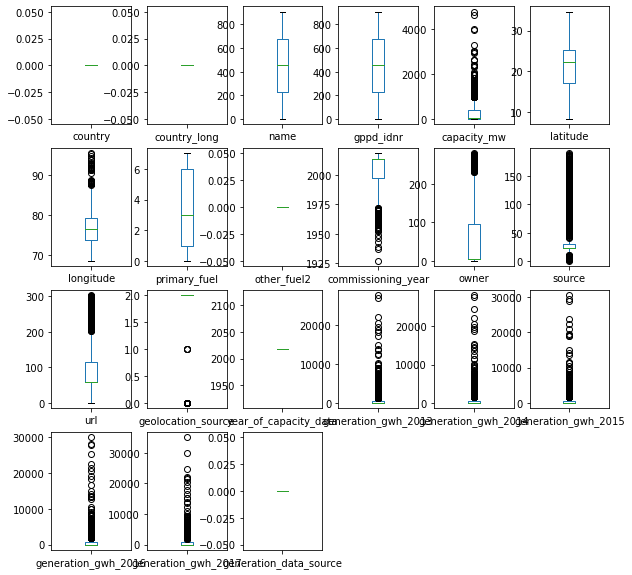

In [103]:
df.plot(kind='box',subplots=True,layout=(4,6),figsize=(10,10))

# Checking Skewness

In [104]:
df.skew()

country                   0.000000
country_long              0.000000
name                      0.000000
gppd_idnr                 0.000000
capacity_mw               3.193257
latitude                 -0.213428
longitude                 1.118449
primary_fuel              0.471141
other_fuel2               0.000000
commissioning_year       -1.779021
owner                     1.366078
source                    1.829145
url                       1.512258
geolocation_source       -2.161710
year_of_capacity_data     0.000000
generation_gwh_2013       5.158053
generation_gwh_2014       4.989441
generation_gwh_2015       5.264211
generation_gwh_2016       4.988235
generation_gwh_2017       4.983065
generation_data_source    0.000000
dtype: float64

Most of the columns have skewness but not considering the outliers and skewness for object columns

In [105]:
df.drop(['country','country_long','name','gppd_idnr','year_of_capacity_data','generation_data_source'],axis=1,inplace=True)

Dropping the columns

In [106]:
df.shape

(908, 15)

# Checking Collinearity

<AxesSubplot:>

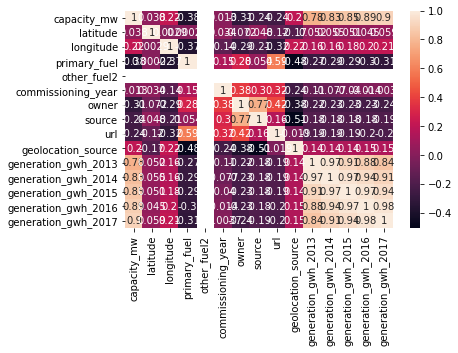

In [107]:
sns.heatmap(df.corr(),annot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

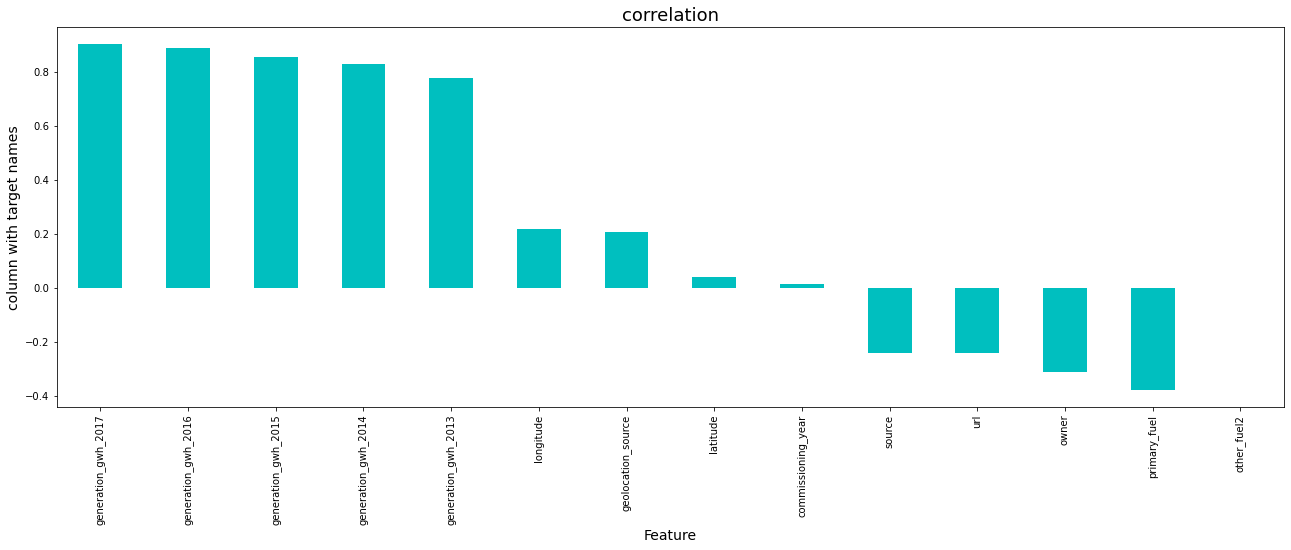

In [108]:
plt.figure(figsize=(22,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show

The heatmap shows that the lighter shades are highly correlated and the graph shows positively and negatively related columns to the target variable capacity_mw

# Splitting the input and target variable

In [109]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

In [110]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return (vif)


In [111]:
calc_vif(x)

,variables,VIF FACTOR
0,latitude,14.214091
1,longitude,298.266510
2,primary_fuel,10.342168
3,other_fuel2,NaN
4,commissioning_year,380.599365
5,owner,4.849538
6,source,7.693317
7,url,6.857847
8,geolocation_source,21.146094
9,generation_gwh_2013,29.014505


In [112]:
x1=df.drop(['commissioning_year'],axis=1)

In [113]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return (vif)

In [114]:
calc_vif(x1)

,variables,VIF FACTOR
0,capacity_mw,7.743708
1,latitude,13.463155
2,longitude,47.921851
3,primary_fuel,9.032141
4,other_fuel2,NaN
5,owner,4.882395
6,source,7.179176
7,url,6.871210
8,geolocation_source,19.151877
9,generation_gwh_2013,28.990567


In [115]:
x=df.drop(['commissioning_year','other_fuel2'],axis=1)

# Using power_transform method to remove skewness¶

In [116]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

# Scaling the input variable

In [117]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [118]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [119]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [120]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.5855789583321274
At random state 0,the testing accuracy is:- 0.5244463606234794


At random state 1,the training accuracy is:- 0.5771245314353188
At random state 1,the testing accuracy is:- 0.5817063661392026


At random state 2,the training accuracy is:- 0.5751127605644124
At random state 2,the testing accuracy is:- 0.603101141462971


At random state 3,the training accuracy is:- 0.5768058111411294
At random state 3,the testing accuracy is:- 0.5816334068887832


At random state 4,the training accuracy is:- 0.5793036884782635
At random state 4,the testing accuracy is:- 0.5610080951989792


At random state 5,the training accuracy is:- 0.5805701057682001
At random state 5,the testing accuracy is:- 0.5509558431699807


At random state 6,the training accuracy is:- 0.5807428869567313
At random state 6,the testing accuracy is:- 0.5522679276882586


At random state 7,the training accuracy is:- 0.5726011107310993
At random state 7,the testing accu

At random state 65,the training accuracy is:- 0.5779333723651763
At random state 65,the testing accuracy is:- 0.5749050781204432


At random state 66,the training accuracy is:- 0.5821471936082088
At random state 66,the testing accuracy is:- 0.5485694220390427


At random state 67,the training accuracy is:- 0.5846865873880135
At random state 67,the testing accuracy is:- 0.5330525481101127


At random state 68,the training accuracy is:- 0.571406966775577
At random state 68,the testing accuracy is:- 0.6477409495321402


At random state 69,the training accuracy is:- 0.5843009085923285
At random state 69,the testing accuracy is:- 0.45897178892997015


At random state 70,the training accuracy is:- 0.5719396388431719
At random state 70,the testing accuracy is:- 0.6554241326130467


At random state 71,the training accuracy is:- 0.5872116494439379
At random state 71,the testing accuracy is:- 0.5251013354610147


At random state 72,the training accuracy is:- 0.5976643280380356
At random state 72

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=99)

# LinearRegression

In [122]:
lr.fit(x_train,y_train)

LinearRegression()

In [123]:
pred_test=lr.predict(x_test)

In [124]:
pred_test

array([-410.89563023,  304.19801085, 1210.22979997, -244.56979152,
        688.46332971,  783.92552209,  666.6829532 ,   95.11854864,
       -186.77859255, 1066.62926236,  -31.96194526,  144.09185383,
        234.91224836, -182.8408034 ,   85.18051549, 1202.16187911,
       -216.34945011,  706.42775148,  248.62582315, -143.49463697,
       -161.89778782,  259.68954551,  927.53787371,  220.84102378,
        108.43802285, 1199.12258727,  628.4541271 ,  330.58775056,
        -47.24925248, -399.0719746 ,  696.84656254,  433.39799114,
       -230.301644  ,  121.47963438,  890.2463489 ,  881.63360851,
       -416.86565865,  438.85291012,  811.38466594,  748.23381084,
       -436.92185039, 1036.65545806,  391.72446113, -227.69473461,
       1071.43529612,  549.11394262,  592.99787982,  189.493437  ,
       -185.9021407 ,  951.79658569,  998.01346751, -230.3105204 ,
        809.58898623,  -85.35368588,  875.99996564,   78.45899362,
         15.56661073,  150.66863604,  703.84393369,  482.40455

In [125]:
print(r2_score(y_test,pred_test))

0.5701242203036601


In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [127]:
cv_score=cross_val_score(lr,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5568662510233822

The r2 score is 57% and the CV score is 56%

# Ridge Regression

In [128]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [129]:
Rid = Ridge(alpha=10,random_state=0)
Rid.fit(x_train,y_train)
Rid.score(x_train,y_train)
pred_Rid = Rid.predict(x_test)

Ridg = r2_score(y_test,pred_Rid)
Ridg

0.5722015856159678

In [130]:
cv_score=cross_val_score(rd,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5572134039397435

In [ ]:
The r2 score is 57% and the CV score is 56%

# Lasso Regression

In [131]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [132]:
ls = Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
lss

0.5703998311557386

In [133]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5572596121141381

The r2 score is 57% and the CV score is 56%

# RandomForestRegressor

In [134]:
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestRegressor

In [135]:
parameters = {'criterion':['mse', 'mae'],
              'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters) 
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [136]:
rf= RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 99.96384753178454
Cross Val Score: 99.60778809193313


# Conclusion:The r2 score and the CV scores are 99.99% and hence RandomForestRegressor is the best model
​